In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
maxTweets = 300
tweets_list_new = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('RussianUkrainianWar since:2022-03-01 until:2022-03-20').get_items()):
    if i>maxTweets:
        break
    tweets_list_new.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

Retrieving scroll page None
Retrieving guest token
Retrieving https://twitter.com/search?f=live&lang=en&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&src=spelling_expansion_revert_click
Retrieved https://twitter.com/search?f=live&lang=en&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&src=spelling_expansion_revert_click: 200
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_

Retrieving scroll page scroll:thGAVUV0VFVBaCwL6FlJj94ykWgMC95e6pguQpEnEVlIR6FYCJehgHREVGQVVMVDUBFQgVAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaCwL6FlJj94ykWgMC95e6pguQpEnEVlIR6FYCJehgHREVGQVVMVDUBFQgVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

Retrieving scroll page scroll:thGAVUV0VFVBaiwLnRm-n44ykWgMC95e6pguQpEnEVyPt5FYCJehgHREVGQVVMVDUBFRIVAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaiwLnRm-n44ykWgMC95e6pguQpEnEVyPt5FYCJehgHREVGQVVMVDUBFRIVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

Retrieving scroll page scroll:thGAVUV0VFVBaIwL2NlObz4ykWgMC95e6pguQpEnEVqPV5FYCJehgHREVGQVVMVDUBFRwVAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaIwL2NlObz4ykWgMC95e6pguQpEnEVqPV5FYCJehgHREVGQVVMVDUBFRwVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

Retrieving scroll page scroll:thGAVUV0VFVBaAwKup28nu4ykWgMC95e6pguQpEnEV6O15FYCJehgHREVGQVVMVDUBFSYVAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaAwKup28nu4ykWgMC95e6pguQpEnEV6O15FYCJehgHREVGQVVMVDUBFSYVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

Retrieving scroll page scroll:thGAVUV0VFVBaGgL3N09Xr4ykWgMC95e6pguQpEnEVrOh5FYCJehgHREVGQVVMVDUBFTAVAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaGgL3N09Xr4ykWgMC95e6pguQpEnEVrOh5FYCJehgHREVGQVVMVDUBFTAVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

Retrieving scroll page scroll:thGAVUV0VFVBaGgLPxz-fp4ykWgMC95e6pguQpEnEVkOR5FYCJehgHREVGQVVMVDUBFToVAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaGgLPxz-fp4ykWgMC95e6pguQpEnEVkOR5FYCJehgHREVGQVVMVDUBFToVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

Retrieving scroll page scroll:thGAVUV0VFVBaKgL7ZxrHp4ykWgMC95e6pguQpEnEVtOJ5FYCJehgHREVGQVVMVDUBFUQVAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaKgL7ZxrHp4ykWgMC95e6pguQpEnEVtOJ5FYCJehgHREVGQVVMVDUBFUQVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

Retrieving scroll page scroll:thGAVUV0VFVBaGgLL9z6Tp4ykWgMC95e6pguQpEnEV-OF5FYCJehgHREVGQVVMVDUBFU4VAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaGgLL9z6Tp4ykWgMC95e6pguQpEnEV-OF5FYCJehgHREVGQVVMVDUBFU4VAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

Retrieving scroll page scroll:thGAVUV0VFVBaEgLnRqdvn4ykWgMC95e6pguQpEnEVuNp5FYCJehgHREVGQVVMVDUBFVgVAAA=
Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=RussianUkrainianWar+since%3A2022-03-01+until%3A2022-03-20&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaEgLnRqdvn4ykWgMC95e6pguQpEnEVuNp5FYCJehgHREVGQVVMVDUBFVgVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel
Retrieved https://api.twitter.com/2/search/adaptive.js

In [3]:
df = pd.DataFrame(tweets_list_new, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
df.head()

,Datetime,Tweet Id,Text,Username
0,2022-03-19 23:59:59+00:00,1505333292740096000,"#Ukraine #UkraineRussianWar #Russia #UkraineWar #RussianUkrainianWar #UkraineWar #Kyiv \n\n""Des responsables ukrainiens déclarent que les Forces russes se regroupent et se préparent pour une nouvelle offensive sur #Kiev ""\nhttps://t.co/jAuiKF2niC",FreeFrance
1,2022-03-19 23:59:29+00:00,1505333165514129408,#MadMen #TimeForRussianMothersToTakeover #RussianUkrainianWar #FoxNews https://t.co/u197JfWj1e,boomer_sa
2,2022-03-19 23:58:30+00:00,1505332921892327424,A video shows part of the battles that the #Chechen forces are fighting with the #Ukrainian forces in #Mariupol..\n#Ukraine #UkraineWar #UkraineRussiaWar\n#Russian #Kiev #Mariupol #Kharkiv #RussianUkrainianWar #Russia https://t.co/w71uUSdFgd,jouhinanewssy
3,2022-03-19 23:54:23+00:00,1505331882392788992,#Ukraine #Ουκρανία #UkraineWar #RussianUkrainianWar #Russia #UkraineRussianWar #UkraineUnderAttack #USA https://t.co/zpgbzwpNQH,Who0066
4,2022-03-19 23:53:40+00:00,1505331702259986437,Behind the scenes look at the Ukraine War movie. #RussianUkrainianWar #Ukraine️ #war #RussiaUkraineCrisis #russianinvasion \nhttps://t.co/0llcfdFyPj,_iGetzItKraken_


In [4]:
# Export dataframe into a CSV
#df.to_csv('tweets_war.csv', sep=',', index=False)

In [5]:
df.Text

0      #Ukraine #UkraineRussianWar #Russia #UkraineWa...
1      #MadMen #TimeForRussianMothersToTakeover #Russ...
2      A video shows part of the battles that the #Ch...
3      #Ukraine #Ουκρανία #UkraineWar #RussianUkraini...
4      Behind the scenes look at the Ukraine War movi...
                             ...                        
296    According to council of #Mariupol (nearly dest...
297    Comienza la información de #RRI en castellano....
298    A girl who went on a picket was detained in Ma...
299    Ukrainian rescuers ask not to set fire to the ...
300    Yes! War is criminal. #RussianUkrainianWar #Ru...
Name: Text, Length: 301, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  301 non-null    datetime64[ns, UTC]
 1   Tweet Id  301 non-null    int64              
 2   Text      301 non-null    object             
 3   Username  301 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 9.5+ KB


In [7]:
df.Datetime

0     2022-03-19 23:59:59+00:00
1     2022-03-19 23:59:29+00:00
2     2022-03-19 23:58:30+00:00
3     2022-03-19 23:54:23+00:00
4     2022-03-19 23:53:40+00:00
                 ...           
296   2022-03-19 20:08:11+00:00
297   2022-03-19 20:07:26+00:00
298   2022-03-19 20:07:11+00:00
299   2022-03-19 20:06:56+00:00
300   2022-03-19 20:06:25+00:00
Name: Datetime, Length: 301, dtype: datetime64[ns, UTC]

In [8]:
df.shape

(301, 4)

In [9]:
df["Text"][0]

'#Ukraine #UkraineRussianWar #Russia #UkraineWar #RussianUkrainianWar #UkraineWar #Kyiv \n\n"Des responsables ukrainiens déclarent que les Forces russes se regroupent et se préparent pour une nouvelle offensive sur #Kiev "\nhttps://t.co/jAuiKF2niC'

In [10]:
def hashtag_extract(text_list):
    hashtags = []
  
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)
    return hashtags
def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
    'Count': list(a.values())})
    
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [11]:
hashtags = hashtag_extract(df["Text"])
hashtags = sum(hashtags, [])

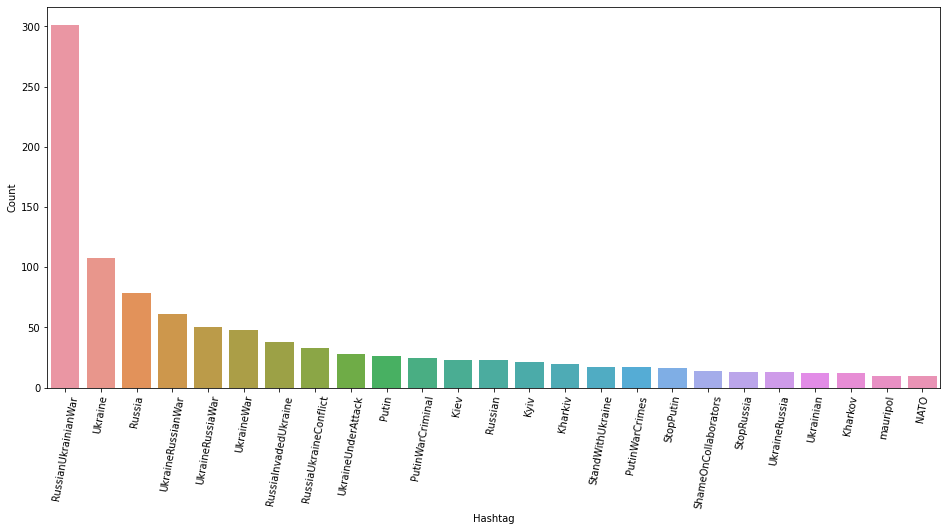

In [12]:
generate_hashtag_freqdist(hashtags)

In [13]:
df['total_length_characters'] = df['Text'].str.len()
print(df['total_length_characters'])
total_length_characters = df['total_length_characters'].sum()
print(f"Total_length_characters: {total_length_characters}")
count = 0
for y in df["Text"]:
    count = count + 1
print(f"Count: {count}")
average_length = total_length_characters / count
print (f'Average_length: {round(average_length,2)}')

0      243
1       94
2      240
3      127
4      147
      ... 
296    283
297    293
298    139
299    185
300    170
Name: total_length_characters, Length: 301, dtype: int64
Total_length_characters: 59855
Count: 301
Average_length: 198.85


In [14]:
df['total_count_words'] = df['Text'].str.split().str.len()
print(df['total_count_words'])
total_words = df['total_count_words'].sum()
print(f"Total_words: {total_words}")
count = 0
for y in df["Text"]:
    count = count + 1
print(f"Count: {count}")
average_words = total_words / count
print (f'Average_words: {round(average_words,2)}')

0      28
1       5
2      29
3       9
4      15
       ..
296    40
297    34
298    17
299    25
300    12
Name: total_count_words, Length: 301, dtype: int64
Total_words: 6783
Count: 301
Average_words: 22.53


In [15]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["Text"] = df["Text"].apply(clean)

In [16]:
df['total_length_characters'] = df['Text'].str.len()
print(df['total_length_characters'])
total_length_characters = df['total_length_characters'].sum()
print(f"Total_length_characters: {total_length_characters}")
count = 0
for y in df["Text"]:
    count = count + 1
print(f"Count: {count}")
average_length = total_length_characters / count
print (f'Average_length: {round(average_length,2)}')

0      189
1       64
2      156
3       95
4       99
      ... 
296    205
297    243
298     84
299    115
300    128
Name: total_length_characters, Length: 301, dtype: int64
Total_length_characters: 42054
Count: 301
Average_length: 139.71


In [17]:
df['total_count_words'] = df['Text'].str.split().str.len()
print(df['total_count_words'])
total_words = df['total_count_words'].sum()
print(f"Total_words: {total_words}")
count = 0
for y in df["Text"]:
    count = count + 1
print(f"Count: {count}")
average_words = total_words / count
print (f'Average_words: {round(average_words,2)}')

0      26
1       4
2      17
3       8
4      11
       ..
296    29
297    30
298    10
299    13
300    10
Name: total_count_words, Length: 301, dtype: int64
Total_words: 4698
Count: 301
Average_words: 15.61


In [18]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [19]:
df['Sentiment'] = df['Text'].apply(lambda x:analyze_sentiment(x))
df['Length'] = df['Text'].apply(len)
df['Word_counts'] = df['Text'].apply(lambda x:len(str(x).split()))

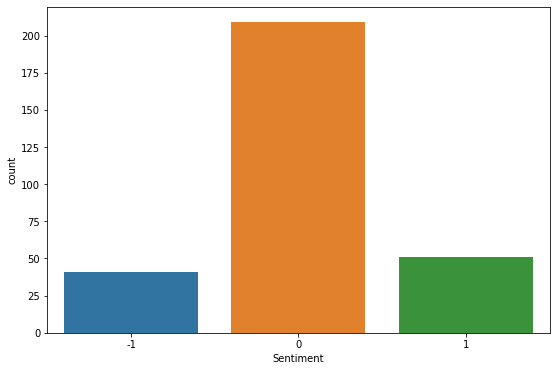

In [20]:
plt.figure(figsize = (9,6))
sns.countplot(data = df, x = 'Sentiment')
plt.show()

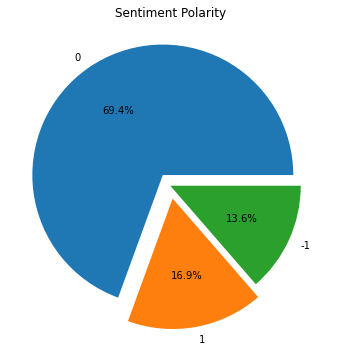

In [21]:
fig, ax = plt.subplots(figsize = (8, 6))
sizes = [count for count in df['Sentiment'].value_counts()]
labels = list(df['Sentiment'].value_counts().index)
explode = (0.1, 0.1, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode)
ax.set_title('Sentiment Polarity')
plt.show()

In [22]:
neutral = df[df['Sentiment'] == 0]
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == -1]

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [23]:
positive.iloc[2]

Datetime                                           2022-03-19 23:47:07+00:00
Tweet Id                                                 1505330056616456195
Text                       one countri order meal ampthen tri forc rest w...
Username                                                             Who0066
total_length_characters                                                  199
total_count_words                                                         26
Sentiment                                                                  1
Length                                                                   199
Word_counts                                                               26
Name: 10, dtype: object

In [24]:
negative.iloc[1]

Datetime                                           2022-03-19 23:53:17+00:00
Tweet Id                                                 1505331608609595395
Text                       mariupol russian foreign journalist help remov...
Username                                                       EliasMezaCota
total_length_characters                                                  205
total_count_words                                                         22
Sentiment                                                                 -1
Length                                                                   205
Word_counts                                                               22
Name: 5, dtype: object

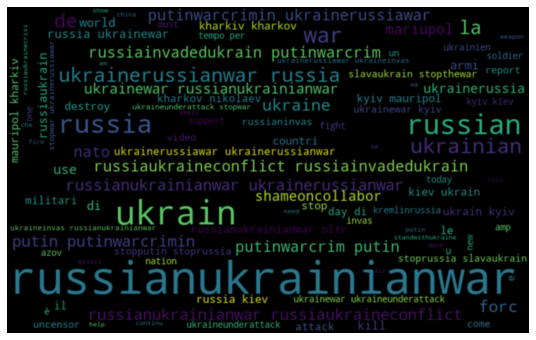

In [25]:
txt = ' '.join(text for text in df['Text'])
wordcloud = WordCloud(
background_color = 'black',
max_font_size = 100,
max_words = 100,
width = 800,
height = 500
).generate(txt)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud,interpolation = 'bicubic')
plt.axis('off')
plt.show()

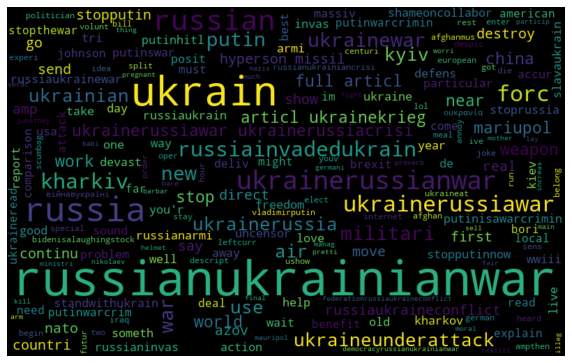

In [26]:
positive_words =' '.join([text for text in df['Text'][df['Sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

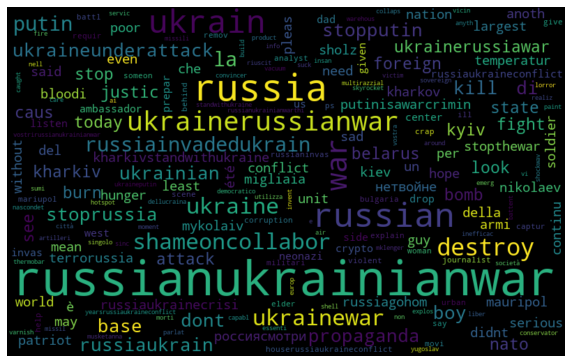

In [27]:
negative_words =' '.join([text for text in df['Text'][df['Sentiment'] == -1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

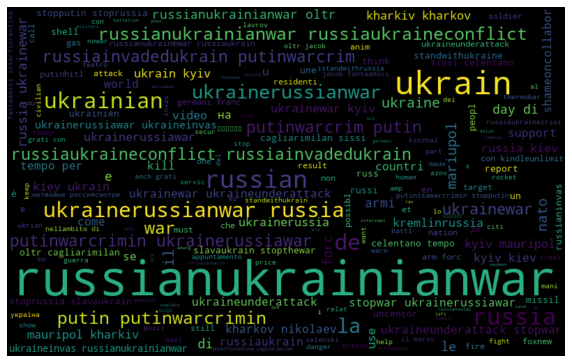

In [28]:
neutral_words =' '.join([text for text in df['Text'][df['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()